
# Univariate Linear Regression on California Housing Data

**Author**: Christo Pananjickal Baby

**Course**: Applied Artificial Intelligence and Machine Learning

**Assignment**: Practical Lab 1

**Date**: 28-05-2025

Kindly run the code blocks in order or click run all.


## 1. Objective
The goal of this Lab is to build three univariate linear regression models to predict `median_house_value` using the following features in the California Housing Prices dataset:
- `median_income`
- `population`
- `households`

We will analyze the data, build the models, evaluate models, and find conclusions in a simple way so that a non-technical stakeholder can understand them.

## 2. Getting the data
Datasource: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
# Install the required dependencies
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("data/housing.csv")


## 3. Exploratory Data Analysis

Using the `describe()` method from pandas to get a quick overview of the dataset easily.

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


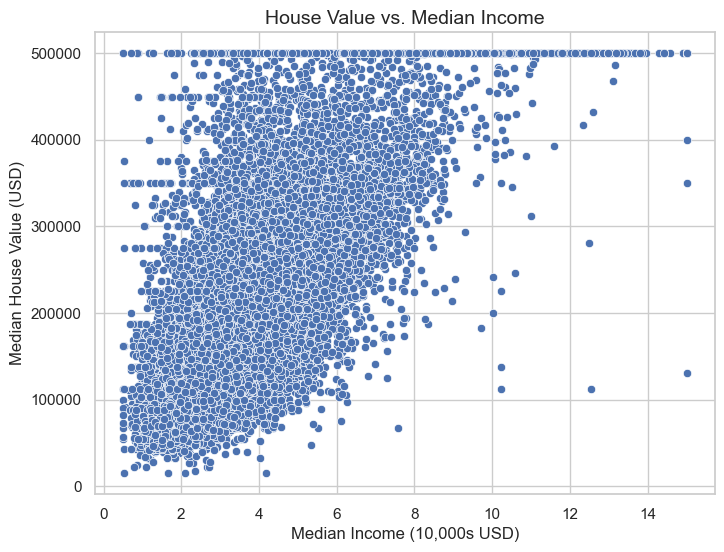

In [5]:
# Set aesthetic style
sns.set(style="whitegrid")

# Plot 1: Median Income vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="median_income", y="median_house_value")
plt.title("House Value vs. Median Income", fontsize=14)
plt.xlabel("Median Income (10,000s USD)")
plt.ylabel("Median House Value (USD)")
plt.show()

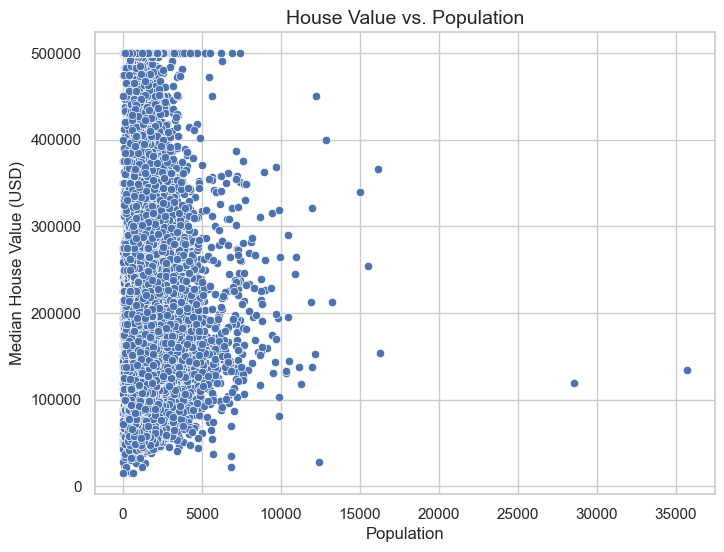

In [6]:
# Plot 2: Population vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="population", y="median_house_value")
plt.title("House Value vs. Population", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Median House Value (USD)")
plt.show()

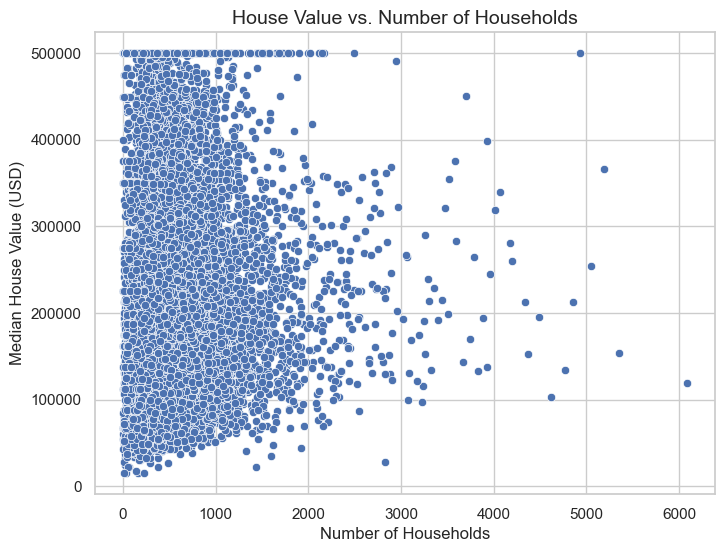

In [7]:
# Plot 3: Number of Households vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="households", y="median_house_value")
plt.title("House Value vs. Number of Households", fontsize=14)
plt.xlabel("Number of Households")
plt.ylabel("Median House Value (USD)")
plt.show()

**Median House Value vs. Median Income**
There is a strong positive relation which we can see in this graph. The higher income, people tend to have more expensive homes. **I think a linear model will give good results in this scenario.** We can see some issues in 500000 USD. That is there is continuous samples in this area for all range of income. This will be an error or outlier most probably. In our data cleaning stage we can remove these data.

**Median House Value vs. Population** From this scatterplot, I couldn't find any direct relations between population and median house value. The house values are randomly scattered across population below 5500. I think a linear regeression model on this relation may not give good results.

**Median House Value vs. Number of Households** From this scatterplot, I would say there is somewhat upward trend. Also, the data points are spread. For this scenario too, I think a linear regression model will not be the best choice.

**Description for 4 variables**

**1. Median House Value** - This is the target variable we are trying to predict. It represents the median house value in each block group(USD). It is in between the range of 15K to 500K. The data continuous data at the topmost value might be due to some kind of clipping or limit set by the data person who collected the data or by the data provider.

**2. Median Income** - This is the median income of households in each block group. It has a range from 0k to 150K. Higher income levels represents better standard of living which can be explained by higher house values.

**3. Population** - Number of people living in a block group. It ranges from less than 100 to more than 35k. As a common logic, this doesn't have any direct relation with the house value.

**4. Number of Households** -Total number of households in a block group. It ranges from 0 to 6K. It has a weak positive trend with the house value.


## 4,6. Linear regressions and Plots

We will build three univariate linear regression models to predict `median_house_value` using the features `median_income`, `population`, and `households`. We will use the `statsmodels` library for building the linear regression models.

Intercept: 45085.58, Slope: 41793.85, MSE: 7011311502.93, MAE: 62625.93


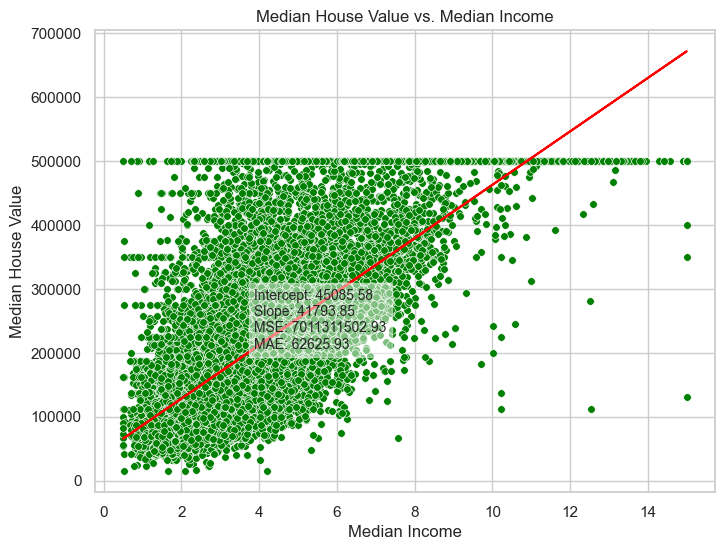

In [8]:
# Median house value vs. median income
# Manually create the initial dataset

# Load full dataset
df = pd.read_csv("data/housing.csv")
df = df.dropna(subset=['median_income', 'median_house_value'])

# Define feature and target
X = df[['median_income']]
y = df['median_house_value']

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
intercept = model.intercept_
slope = model.coef_[0]
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Print
print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, s=30, color='green')
plt.plot(df['median_income'], y_pred, color='red')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.text(df['median_income'].mean(), df['median_house_value'].mean(),
         f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

Intercept: 210436.26, Slope: -2.51, MSE: 13307412412.39, MAE: 91153.82


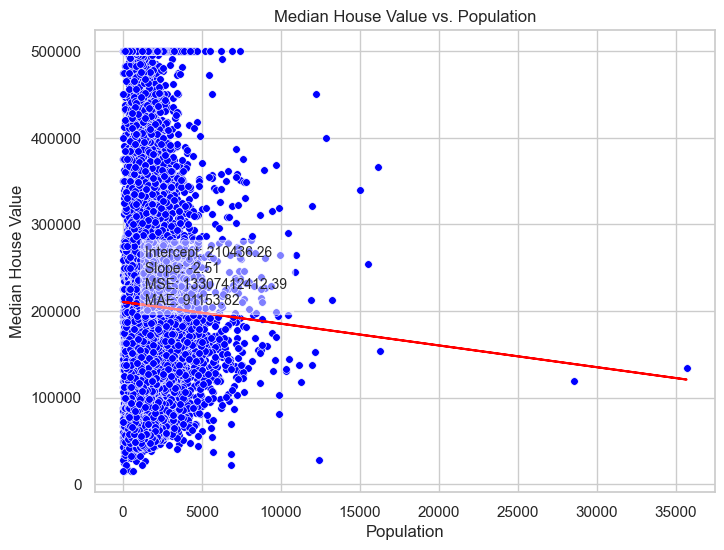

In [9]:
 # Median house value vs. population

# Load full dataset
df = pd.read_csv("data/housing.csv")
# Drop missing values
df = df.dropna(subset=['population', 'median_house_value'])

# Define feature and target
X = df[['population']]
y = df['median_house_value']

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
intercept = model.intercept_
slope = model.coef_[0]
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Print
print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='population', y='median_house_value', data=df, s=30, color='blue')
plt.plot(df['population'], y_pred, color='red')
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.text(df['population'].mean(), df['median_house_value'].mean(),
         f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()


Intercept: 196928.58, Slope: 19.87, MSE: 13257776904.73, MAE: 90802.74


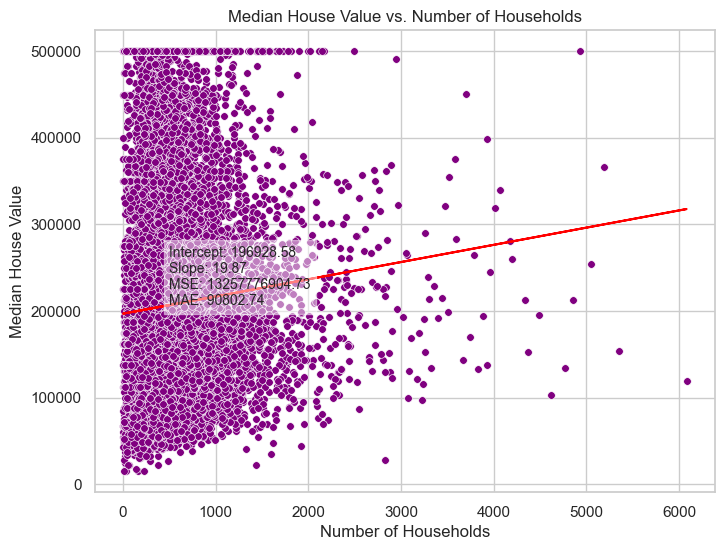

In [10]:
# Median house value vs. number of households

# Drop missing values
df = pd.read_csv("data/housing.csv")
df = df.dropna(subset=['households', 'median_house_value'])

# Define feature and target
X = df[['households']]
y = df['median_house_value']

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
intercept = model.intercept_
slope = model.coef_[0]
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Print
print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='households', y='median_house_value', data=df, s=30, color='purple')
plt.plot(df['households'], y_pred, color='red')
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.text(df['households'].mean(), df['median_house_value'].mean(),
         f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()



## 5. Table summary

| Independent Variable | Intercept | Slope      | Mean Squared Error (MSE) | Mean Absolute Error (MAE) |
| -------------------- | --------- |------------|--------------------------|--------------------------|
| Median Income        |45085.58 | 41793.85 | 7011311502.93                       | 62625.93                         |
| Population           |  210436.26| -2.51    | 13307412412.39                  | 91153.82                     |
| Number of Households |196928.58| 19.87     | 13257776904.73                   |90802.74                  |



## 7. Summary


| Independent Variable | MSE (lower better) | MAE (lower better) | Notes                                                       |
| ---------------- |--------------------|--------------------|-------------------------------------------------------------|
| Median Income    | **7.01B**          | **62,625.93**      | Strongest linear relationship, lowest error values good fit |
| Population       | 13.31B             | 91,153.82          | Weak linear relationship, poor model fit                    |
| Number of Households | 13.26B             | 90,802.74          | Slightly better than population, but still poor model fit   |



* Median income is the most significant feature in predicting median house value. It have lowest MSE and MAE error and good slope.
* Both population and number of households are having a weak linear relationship which is proved by the high MSE and MAE error values and low slopes.
* As a conclusion we can say that the for univariate prediction of housing prices, median income must be given a higher weightage than the other two features.
